In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

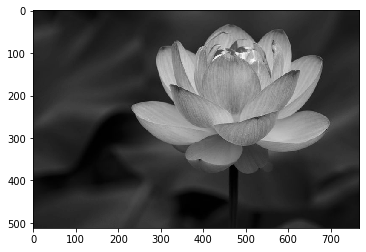

In [4]:
image = Image.open("lotus-flower.jpg")

# part a
gs = np.array(image.convert("L"))
imgplot = plt.imshow(gs, vmin=0, vmax=255, cmap='gray')

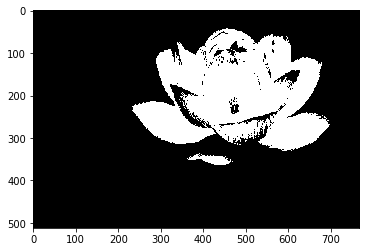

In [7]:
# part b
bw = np.where(gs>125,255,0)
imgplot = plt.imshow(bw, vmin=0, vmax=255, cmap='gray')

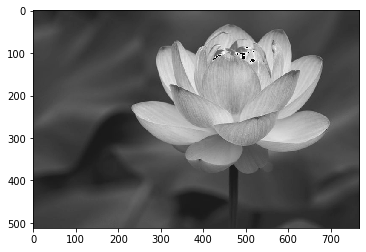

In [14]:
# part c
shft = np.clip(gs + 25, 0, 255)
imgplot = plt.imshow(shft, vmin=0, vmax=255, cmap='gray')

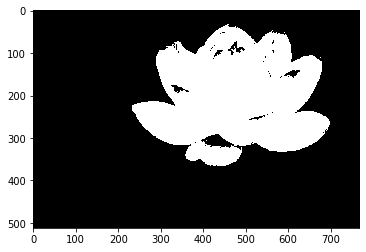

In [20]:
# part d
import cv2 as cv
th,otsu = cv.threshold(gs,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imgplot = plt.imshow(otsu, vmin=0, vmax=255, cmap='gray')

Otsu's method found an optimal threhold of 95

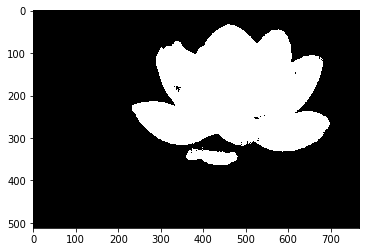

In [32]:
# part e
from sklearn.cluster import KMeans
I = np.array(image)
y,x,z = I.shape
I = I.reshape(x*y,z)
kmeans = KMeans(n_clusters=3, random_state=0).fit(I)
km = kmeans.labels_.reshape(y,x)
km = np.where(km==1,255,0)
imgplot = plt.imshow(km, vmin=0, vmax=255, cmap='gray')

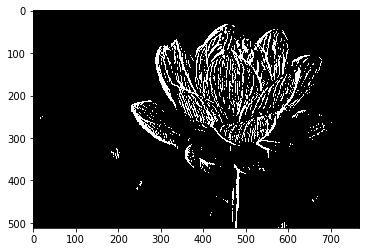

In [46]:
# part f 
from scipy import ndimage
sbl = cv.Sobel(gs,cv.CV_64F,1,0,ksize=5)
cutoff = 200
sbl = np.where(sbl>cutoff,255,0)
imgplot = plt.imshow(sbl, vmin=0, vmax=255, cmap='gray')

The edges of the petals become more clear the greater the cutoff

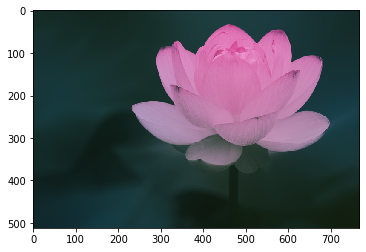

In [55]:
# part g
I = np.array(image)
I = cv.bilateralFilter(I, -1, 100, 100)
imgplot = plt.imshow(I)

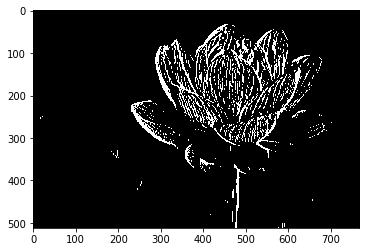

In [60]:
gs = np.array(Image.fromarray(I).convert("L"))
sbl = cv.Sobel(gs,cv.CV_64F,1,0,ksize=5)
cutoff = 220
sbl = np.where(sbl>cutoff,255,0)
imgplot = plt.imshow(sbl, vmin=0, vmax=255, cmap='gray')

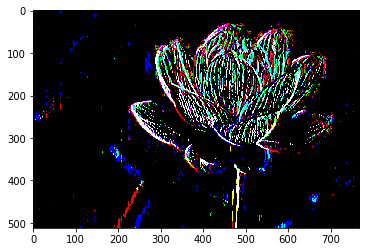

In [63]:
I = np.array(image)
sbl = cv.Sobel(I,cv.CV_64F,1,0,ksize=5)
cutoff = 220
sbl = np.where(sbl>cutoff,255,0)
imgplot = plt.imshow(sbl, vmin=0, vmax=255, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


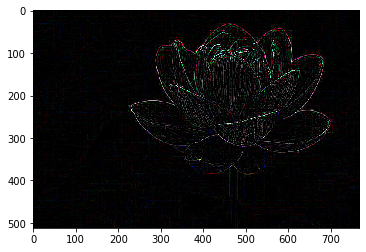

In [74]:
ddepth = cv.CV_16S
kernel_size = 3
lap = cv.Laplacian(I, ddepth, ksize=kernel_size)
imgplot = plt.imshow(lap)

I do not see a considerable difference in edge detection for the color vs grayscale image when I try the Sobel operator.  I also tried to denoise it by using the bilateral filter.  I think the best results are from the image above using the laplacian operator on the color image.